In [44]:
import matplotlib.pyplot as plt

def draw_rectangle(start_x, start_y, end_x, end_y, line_color='black', fill_color=None, line_width=1.0):
    rect = plt.Rectangle((start_x, start_y), end_x - start_x, end_y - start_y, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(rect)

def draw_line(start_x, start_y, end_x, end_y, line_color='black', line_width=1.0):
    plt.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_width)

def draw_circle(center_x, center_y, radius, line_color='black', fill_color=None, line_width=1.0):
    circle = plt.Circle((center_x, center_y), radius, edgecolor=line_color, fill=fill_color is not None, linewidth=line_width, facecolor=fill_color)
    plt.gca().add_patch(circle)

In [91]:
import numpy as np

def draw_marker(x, min_y, max_y, circle_raidus, color):
    draw_line(x, min_y, x, max_y, line_color='black', line_width=0.5)
    draw_circle(x, max_y, circle_raidus, line_color='black', fill_color=color, line_width=0.5)

def draw_fig(limits, protein_limits, markers):
    gray_x_min, gray_x_max = 0.15, 0.85
    gray_y_min, gray_y_max = 0.492, 0.508
    plt.figure(figsize=(20,20))
    a = 0.2
    b = 0.8

    max_x = max(np.max(limits), np.max(protein_limits), np.max(markers))
    print(max_x)
    
    # normalize into [0, 1]
    preprocess = lambda x: (x / max_x) * (b - a) + a
    limits = np.array(list(map(preprocess, limits)))
    protein_limits = np.array(list(map(preprocess, protein_limits)))
    markers = np.array(list(map(preprocess, markers)))
    
    # draw the gray bar
    draw_rectangle(gray_x_min, gray_y_min, gray_x_max, gray_y_max, line_color='gray', fill_color='gray', line_width=2.0)

    # draw markers
    marker_length = 0.02 # todo: make this dependend on how often the marker is present
    marker_radius = 0.0025 # todo: make this dependend on how often the marker is present
    marker_y_min, marker_y_max = gray_y_max, gray_y_max + marker_length
    for marker in markers:
        draw_marker(marker, marker_y_min, marker_y_max, marker_radius, 'red')
    
    # draw the exons
    exon_y_min, exon_y_max = 0.485, 0.515
    for exon_x_min, exon_x_max in limits:
        draw_rectangle(exon_x_min, exon_y_min, exon_x_max, exon_y_max, line_color='black', fill_color='black', line_width=2.0)
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.show()

limits = [
    (65, 398),
    (530, 555),
    (560, 650),
    (653, 730),
    (739, 815),
    (1090, 1345)
]

limits = np.array(limits)
protein_limits = np.sort(np.concatenate((np.array([0]),np.random.randint(0, 1390, 19),np.array([1390]))))
markers = np.random.randint(0, 1390, 150)

print(limits)
print(protein_limits)
print(markers)

[[  65  398]
 [ 530  555]
 [ 560  650]
 [ 653  730]
 [ 739  815]
 [1090 1345]]
[   0   31   37  137  169  213  261  360  404  410  489  545  593  672
  878  913 1072 1140 1178 1291 1390]
[  22  886 1084   53 1382 1289 1178  106  236  816  472  682  348  417
  155 1105 1225  389  679  407   22 1369  406 1226  438 1320 1364  423
 1302  139  949  479  314  679 1160 1327 1254  228 1363 1346  736 1046
  559  217   32  246  403  955  401 1061  723  884 1129 1191  347  114
  212  765  331 1208  879  874 1286  989  952 1057 1178   42 1302  226
 1116 1238 1065  875  596  872  690  544  655  253  299 1162 1379  253
 1140  305 1359   57  122  289   33  401  761  844 1217  905 1105 1353
  193  301  418  663  740 1318  125  919  638  800  679 1340  391  861
  732  270  135 1114 1349 1190  133  852  548 1276 1047 1250  572  478
  267  104 1297  518  738  829  855  989   29  282  337 1091  256 1064
 1036  533  891  228  131  696  852  416  576 1157]


1390


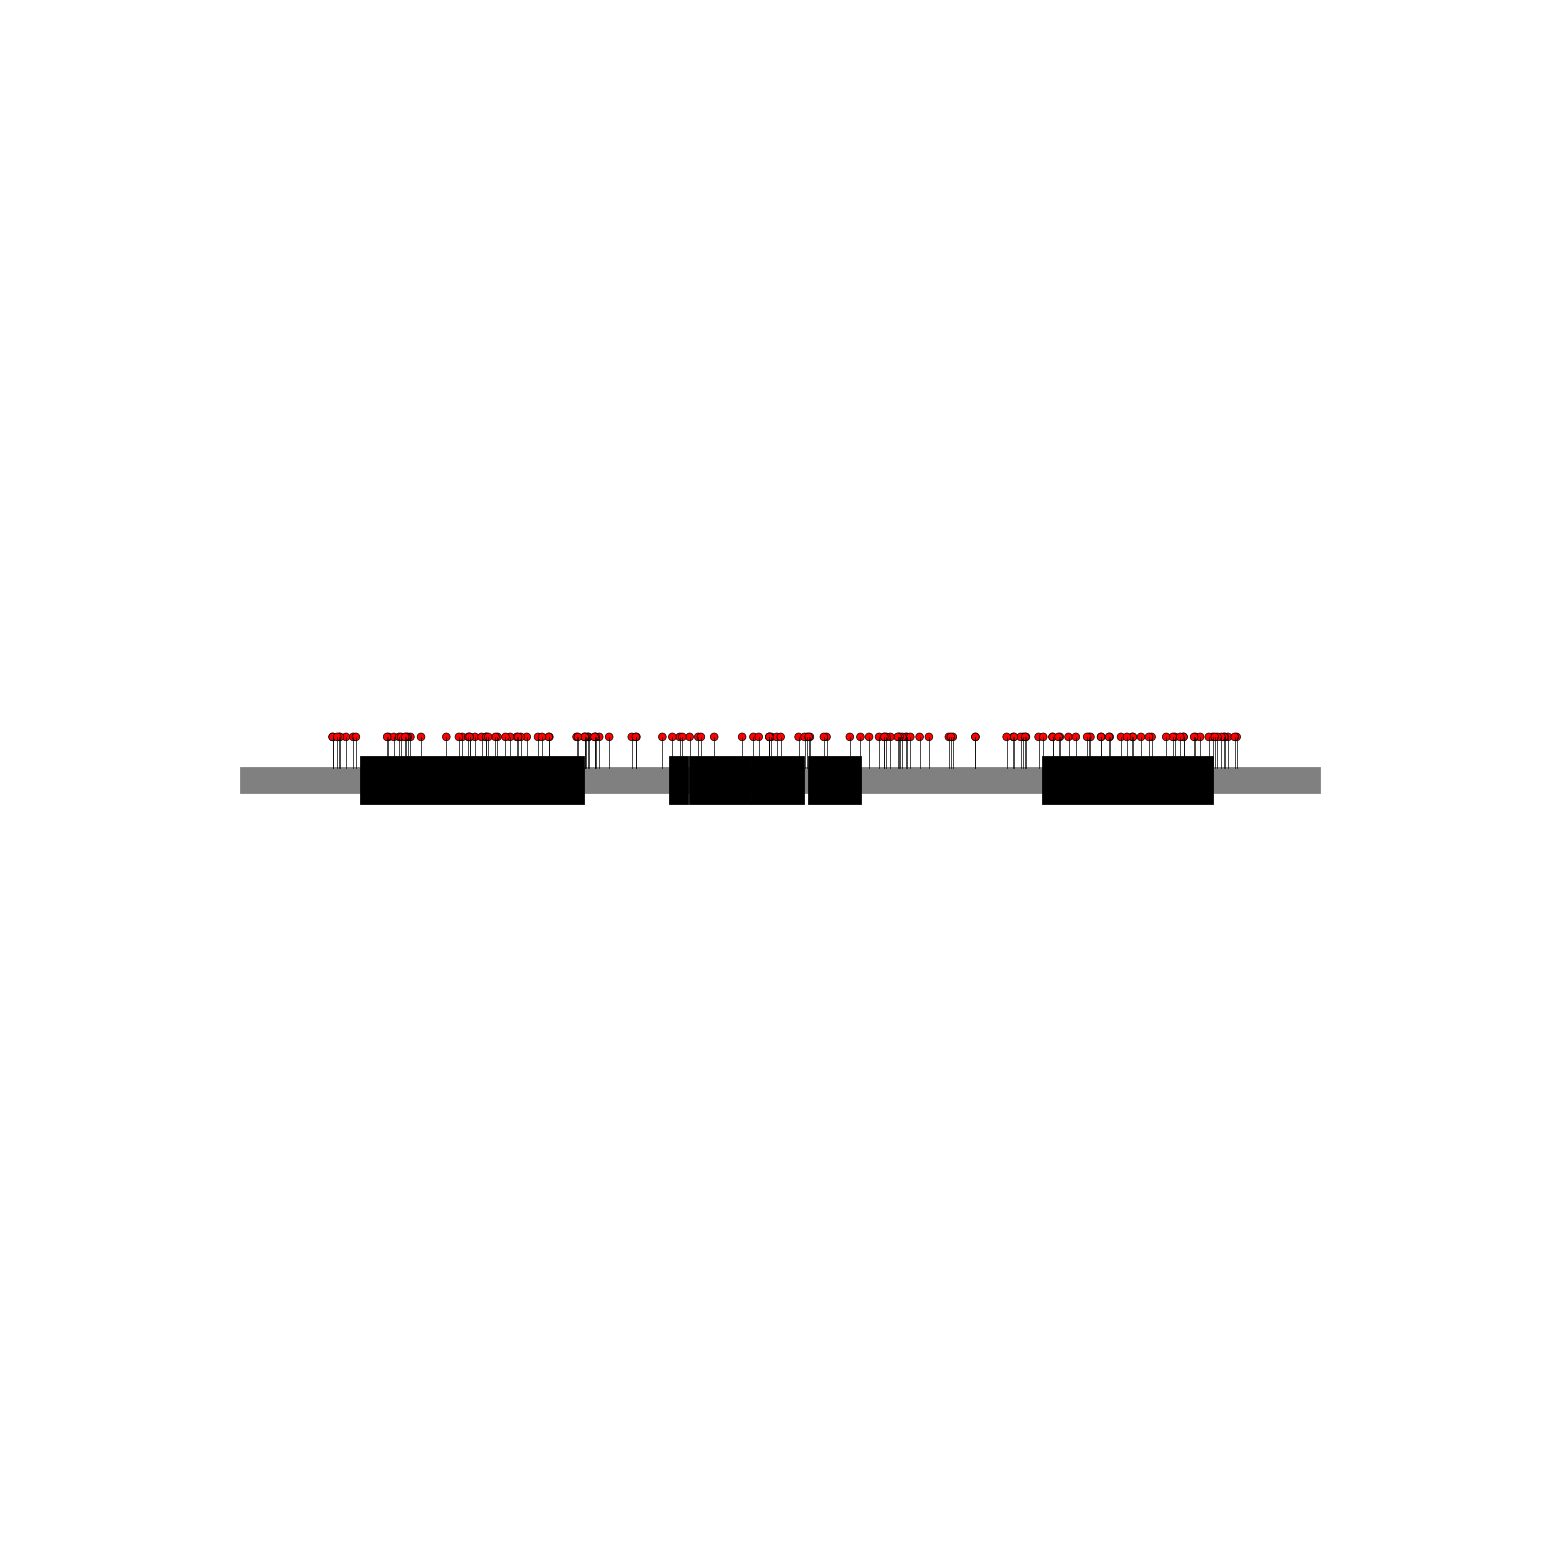

In [92]:
draw_fig(limits, protein_limits, markers)